In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("/content/Zoo.csv")

In [5]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
df.shape

(101, 18)

In [10]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [12]:
#check if any animal is duplicated
duplicate=df['animal name'].value_counts()
duplicate[duplicate>1]

frog    2
Name: animal name, dtype: int64

In [13]:
frog=df[df['animal name']=='frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

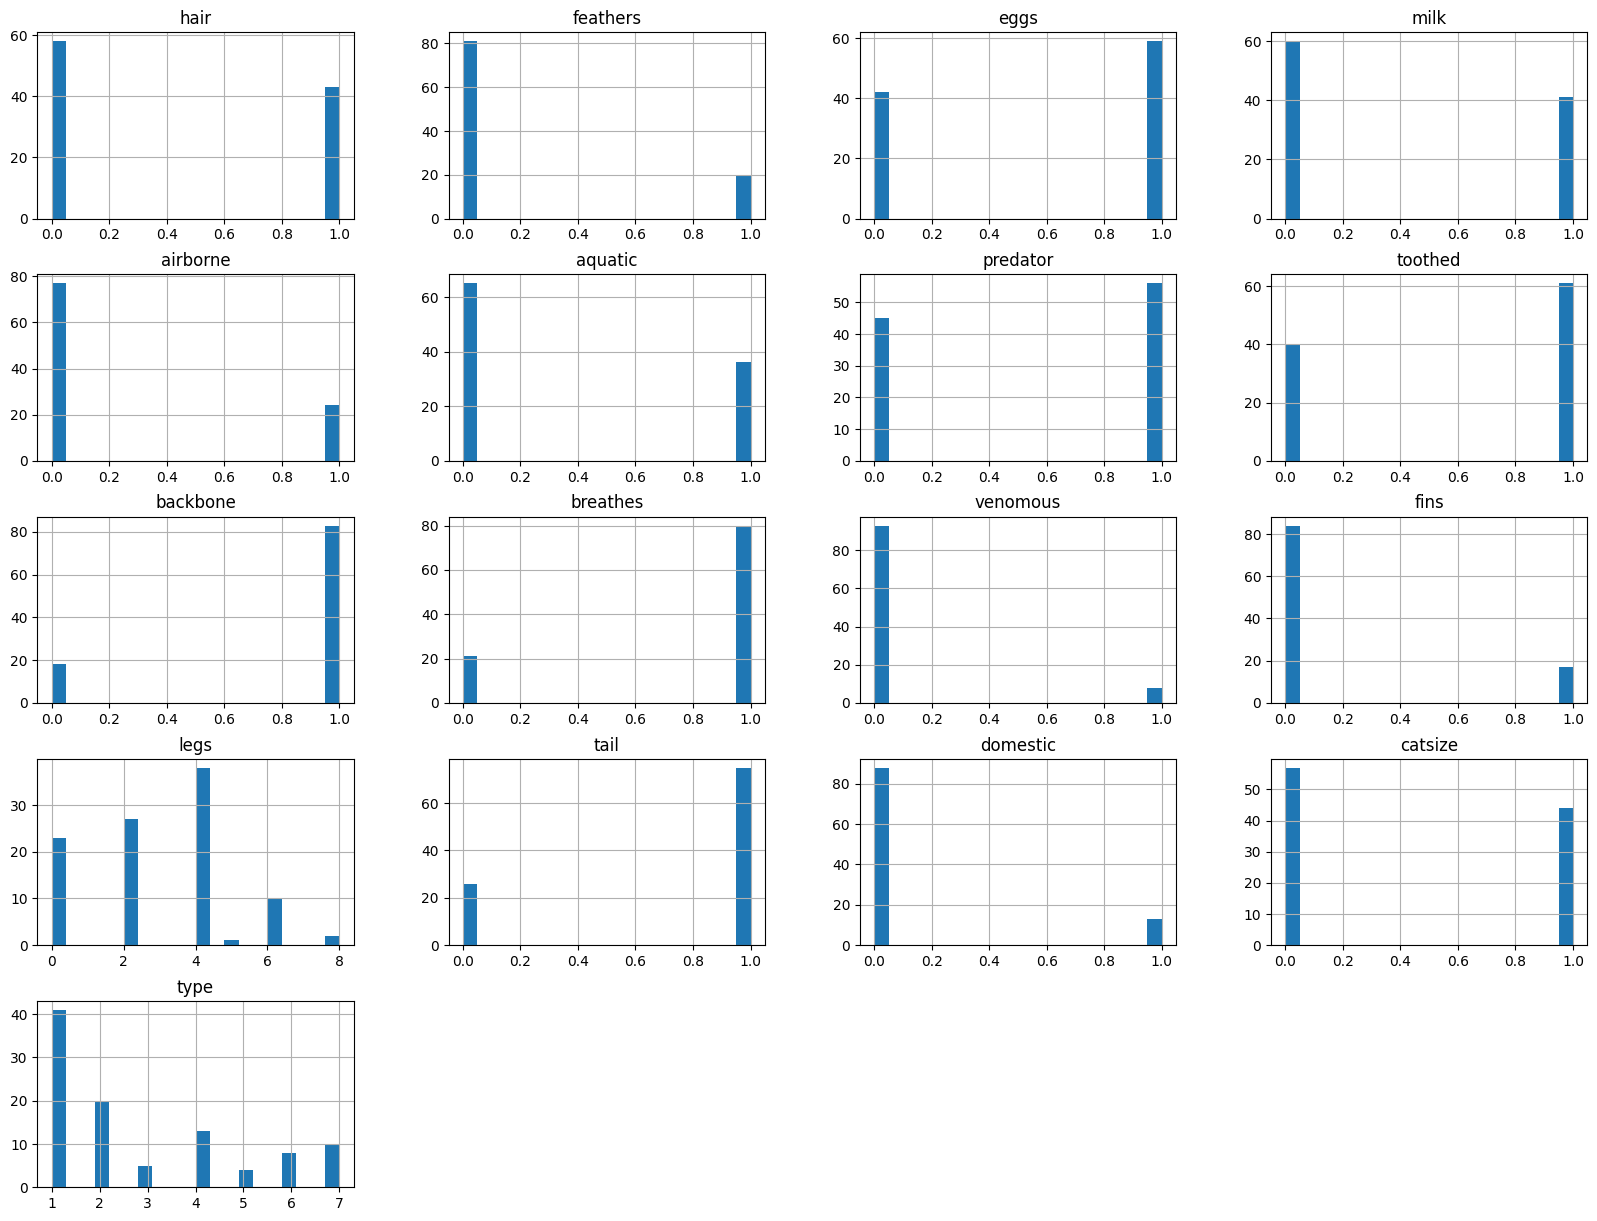

In [14]:
df.hist(bins=20, figsize=(20,15))

In [22]:
x=df.iloc[:,1:16]
y=df.iloc[:,16]
y

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=33)

In [25]:
model=KNeighborsClassifier(n_neighbors=12)
model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=12)

In [26]:
ypred=model.predict(xtest)

In [27]:
ypred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.83      0.56      0.67         9

    accuracy                           0.76        21
   macro avg       0.78      0.74      0.74        21
weighted avg       0.78      0.76      0.75        21



In [30]:
print(accuracy_score(ytest,ypred))

0.7619047619047619


In [31]:
model.score(xtrain,ytrain)

0.7875

## **Grid Search for Algorithm Tuning**

In [32]:
n=np.array(range(1,40))
params=dict(n_neighbors=n)

In [33]:
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model1,param_grid=params)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [36]:
print(grid.best_score_)
print(grid.best_params_)

0.800952380952381
{'n_neighbors': 7}


# **Visualizing the CV results**

In [38]:
k_range=range(1,40)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())
pd.Series(k_scores).sort_values(ascending=False)

8     0.790909
9     0.780909
6     0.773636
5     0.770909
10    0.770909
7     0.762727
11    0.750909
15    0.740909
25    0.740909
23    0.740909
22    0.740909
21    0.740909
19    0.730909
17    0.730909
24    0.730909
20    0.730909
18    0.730909
16    0.730909
14    0.730909
12    0.730909
2     0.723636
4     0.723636
29    0.720909
28    0.720909
27    0.720909
26    0.720909
13    0.720909
3     0.713636
34    0.710909
30    0.700909
31    0.700909
33    0.700909
32    0.690909
35    0.690909
37    0.690909
36    0.680909
38    0.670909
0     0.643636
1     0.636364
dtype: float64

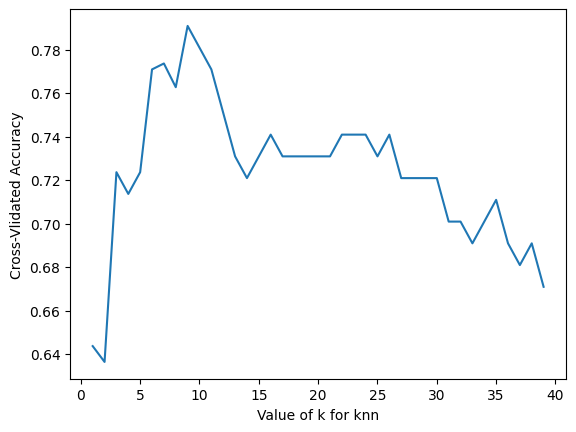

In [40]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of k for knn')
plt.ylabel('Cross-Vlidated Accuracy')
plt.show()

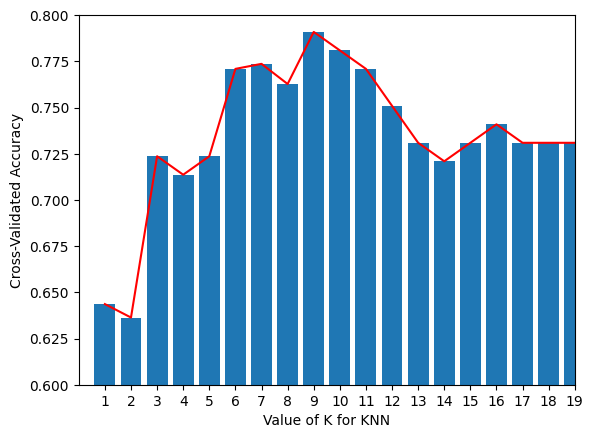

In [41]:
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.xlim(0.0,19)
plt.ylim(0.6,0.8)
plt.show()

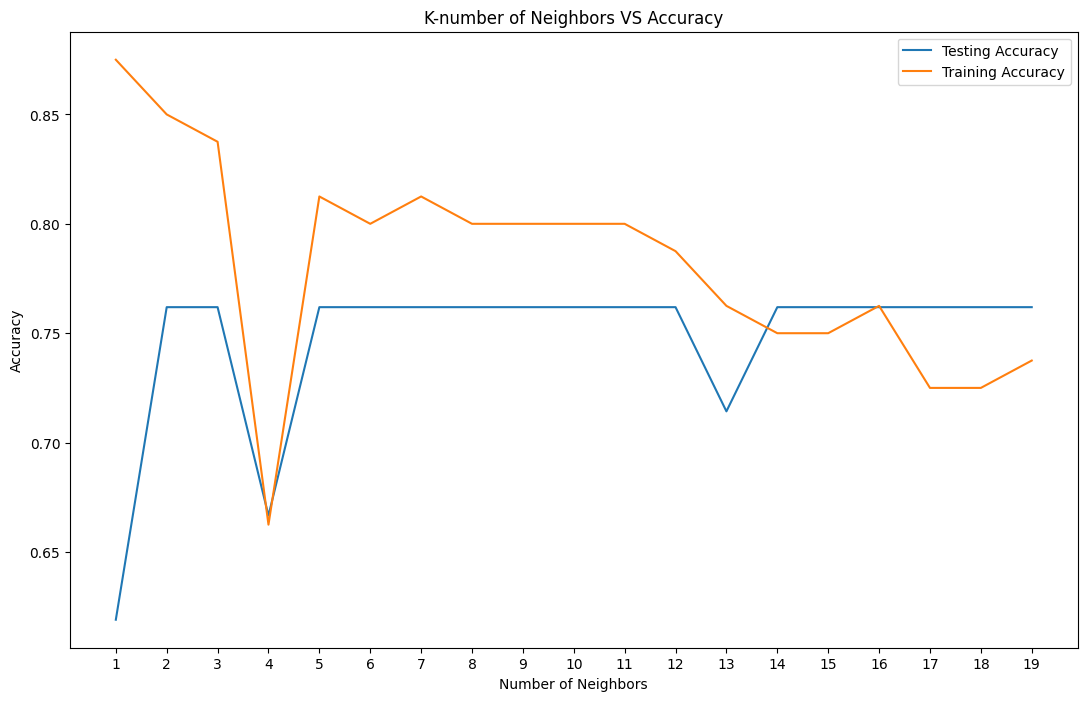

Best Accuracy is 0.7619047619047619 with k =2


In [43]:
k_values=np.arange(1,20)
train_accuracy=[]
test_accuracy=[]

for i,j in enumerate(k_values):
  knn1=KNeighborsClassifier(n_neighbors=j)
  knn1.fit(xtrain,ytrain)
  train_accuracy.append(knn1.score(xtrain,ytrain))
  test_accuracy.append(knn1.score(xtest,ytest))

plt.figure(figsize=[13,8])
plt.plot(k_values,test_accuracy, label='Testing Accuracy')
plt.plot(k_values,train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('K-number of Neighbors VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()
print("Best Accuracy is {} with k ={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))